# Import

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout

# Gathering edges

In [2]:
# Load daughter-father file
edges = pd.read_csv('../../data/interim/disease_parent_treenumbers.csv')

# Rename
edges.rename(columns={'Diease_TreeNumber':'Disease', 'Parent_TreeNumber': 'Parent'}, inplace=True)

# Echo
edges.head()

,Disease,Parent
0,C23.888.592.612.054.200,C23.888.592.612.054
1,C23.888.821.030.249,C23.888.821.030
2,C26.017,C26
3,C04.588.033,C04.588
4,C16.320.565.398.500.440.500,C16.320.565.398.500.440


# Gathering nodes

In [3]:
#Load labels
nodes = pd.read_csv('../../data/interim/disease_tree_heading_count.csv')

# Rename columns
nodes.rename(columns={
    'Diease_TreeNumber':'Disease',
    'Disease_Mesh_Heading':'Label',
    'Disease_Count':'Counts'}, inplace=True)

# Rescale counts
nodes.Counts = 1+np.log(1+nodes.Counts)

# Echo
nodes.head()

,Disease,Label,Counts
0,C23.888.592.612.054.200,"Abdomen, Acute",1.000000
1,C26.017,Abdominal Injuries,1.000000
2,C04.588.033,Abdominal Neoplasms,4.258097
3,C16.320.565.398.500.440.500,Abetalipoproteinemia,2.791759
4,C16.131,Congenital Abnormalities,8.414573


# Construct graph

In [4]:
# Construct whole Hierachical tree (Arrow from parent to daughter)
g = nx.from_pandas_edgelist(edges, 
                            source='Parent', 
                            target='Disease', 
                            create_using=nx.DiGraph)

# Add nodes attributes - Labels
labels = nodes['Disease Label'.split()].set_index('Disease').to_dict()['Label']
nx.set_node_attributes(g, labels, 'Label')

# Add nodes attributes - Counts
counts = nodes['Disease Counts'.split()].set_index('Disease').to_dict()['Counts']
nx.set_node_attributes(g, counts, 'Counts')

# Save to gephi
nx.write_gexf(g, 'Hierarchy.gexf')

# Echo info
print('  Size (Nodes): ', g.size())
print(' Order (Edges): ', g.order())
print(' Graph Density: ', nx.density(g))

  Size (Nodes):  11648
 Order (Edges):  11649
 Graph Density:  8.584427847883938e-05


/Users/luvela/anaconda3/lib/python3.7/site-packages/pygraphviz/agraph.py:1367: RuntimeWarning: Error: remove_overlap: Graphviz not built with triangulation library

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


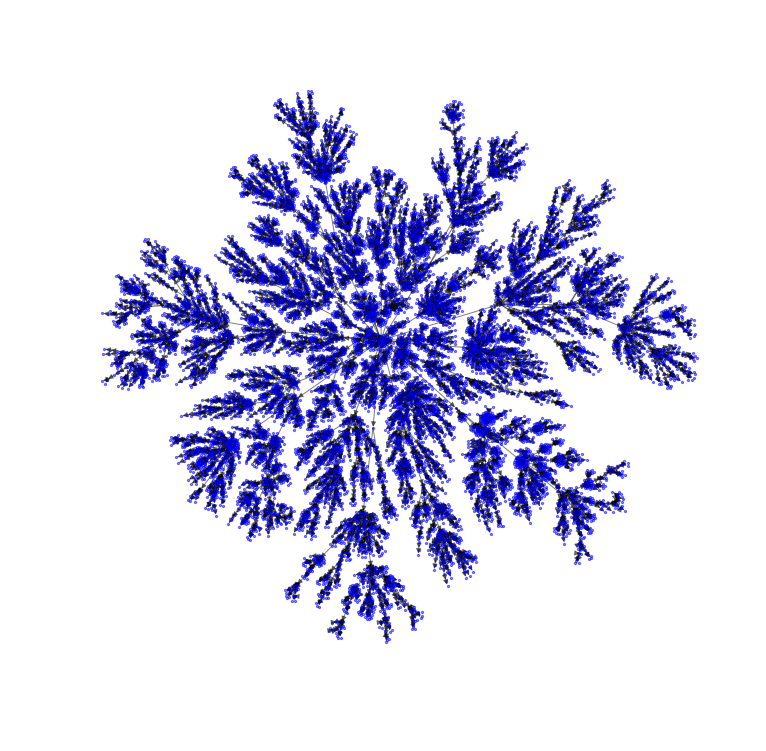

In [5]:
# Get positions from graphviz_layout
pos = graphviz_layout(g, prog='sfdp', args='')

# Plot
plt.figure(figsize=(10, 10))
nx.draw(g, pos, node_size=5, alpha=0.5, node_color="blue", with_labels=False)
plt.axis('equal')
plt.show()